# Shear bias simple test 2

**2017-04-27** 

This is a numerical test of shear bias inferred from GalSim simulations of galaxy stamps. 

This is the same as [`Shear bias simple test 1`](Shear bias simple test 1.ipynb) except using the JIF `Roaster` likelihood function. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import galsim
import jif

## Fiducial model

Here are the model parameters, stamp size, and noise level that are held fixed throughout.

In [2]:
HLR = 1.0
PSF = galsim.Kolmogorov(fwhm=0.6)
scale = 0.2
nx = ny = 64
var = 3e-10
noise = galsim.GaussianNoise(sigma=np.sqrt(var))

In [3]:
def make_data(e1, e2, nu=0.5):
    """ Simulate the fake data: a galaxy stamp image
    """
    gal = galsim.Spergel(nu, half_light_radius=HLR)
    gal = gal.shear(galsim.Shear(e1=e1, e2=e2))
    obj = galsim.Convolve(PSF, gal)
    img = obj.drawImage(nx=nx, ny=ny, scale=scale)
    img.addNoise(noise)    
    return img

In [29]:
gg = jif.galsim_galaxy.GalSimGalaxyModel()

gg.set_param_by_name("nu", 0.5)
gg.set_param_by_name("hlr", HLR)
gg.set_param_by_name("mag_sed1", 40.3)

data_image = galsim.Image(ncol=nx, nrow=ny, scale=scale)
print gg.__dict__

def lnlike2(e1, e2, img):
    gg.set_params([e1, e2])
    model = gg.get_image(out_image=data_image)
    delta = (model.array - img.array)**2
    lnnorm = - 0.5 * nx * ny * np.sqrt(var * 2 * np.pi)
    return -0.5*np.sum(delta / var) + lnnorm

{'n_psf_params': 0, 'paramnames': ['e1', 'e2'], 'pixel_scale_arcsec': 0.2, 'gsparams': galsim.GSParams(16,4096,0.1,5.0,0.2,0.1,0.1,1.0,0.0001,1e-06,1e-06,1e-08,0.1,0.81,32,0.0001), 'psf_model_type': 'PSFModel class', 'n_params': 2, 'active_parameters': ['e1', 'e2'], 'telescope_model': 'LSST', 'paramtypes': [('redshift', '<f8'), ('nu', '<f8'), ('hlr', '<f8'), ('e1', '<f8'), ('e2', '<f8'), ('mag_sed1', '<f8'), ('mag_sed2', '<f8'), ('mag_sed3', '<f8'), ('mag_sed4', '<f8'), ('dx', '<f8'), ('dy', '<f8')], 'active_parameters_galaxy': ['e1', 'e2'], 'galaxy_model': 'Spergel', 'params': rec.array([( 1.,  0.5,  1.,  0.26,  0.,  40.3,  99.,  99.,  99.,  0.,  0.)], 
          dtype=[('redshift', '<f8'), ('nu', '<f8'), ('hlr', '<f8'), ('e1', '<f8'), ('e2', '<f8'), ('mag_sed1', '<f8'), ('mag_sed2', '<f8'), ('mag_sed3', '<f8'), ('mag_sed4', '<f8'), ('dx', '<f8'), ('dy', '<f8')]), 'gain': 1.0, 'filter_name': 'r', 'psf_model': <jif.psf_model.PSFModel object at 0x112fc3b50>, 'psf_paramnames': []}


In [4]:
# def lnlike2(e1, e2, img, nu=0.5):
#     """ Evaluate the log-likelihood of the galaxy stamp image
    
#     Use the fiducial parameters listed above to build the data model.
#     """
#     gal = galsim.Spergel(nu, half_light_radius=HLR, flux=1.0)
#     gal = gal.shear(galsim.Shear(e1=e1, e2=e2)) 
#     gal = gal.shift(0.0, 0.0)
#     obj = galsim.Convolve(PSF, gal)
#     model = obj.drawImage(nx=nx, ny=ny, scale=scale)
#     delta = (model.array - img.array)**2
#     lnnorm = - 0.5 * nx * ny * np.sqrt(var * 2 * np.pi)
#     return -0.5*np.sum(delta / var) + lnnorm

# rstr = jif.Roaster("roaster.yaml")
# rstr.num_epochs = 1
# rstr.nx = [nx]
# rstr.ny = [ny]
# rstr.pix_noise_var = [var]
# rstr.filter_names = ['r']
# rstr.gain = 1.0

# rstr._init_galaxy_models(nimages=1, tel_names=['LSST'], psfs=['model'])
# rstr.initialize_param_values(rstr.config['init']['init_param_file'])

# # print jif.parameters.flux_from_AB_mag(40.369597)
# rstr.set_param_by_name("mag_sed1", 40.369597)

# rstr.set_param_by_name('hlr', HLR)

# def lnlike2(e1, e2, img):
#     rstr.pixel_data = [img.array]
#     params = np.array([e1, e2])
#     return rstr.lnlike(params)

2017-04-26 19:55:40,738 - DEBUG - Setting redshift to 1.000000
2017-04-26 19:55:40,740 - DEBUG - Setting nu to 0.500000
2017-04-26 19:55:40,741 - DEBUG - Setting hlr to 1.000000
2017-04-26 19:55:40,743 - DEBUG - Setting e1 to 0.000000
2017-04-26 19:55:40,745 - DEBUG - Setting e2 to 0.050000
2017-04-26 19:55:40,747 - DEBUG - Setting mag_sed1 to 40.000000
2017-04-26 19:55:40,748 - DEBUG - Setting mag_sed2 to 99.000000
2017-04-26 19:55:40,749 - DEBUG - Setting mag_sed3 to 99.000000
2017-04-26 19:55:40,751 - DEBUG - Setting mag_sed4 to 99.000000
2017-04-26 19:55:40,752 - DEBUG - Setting dx to 0.000000
2017-04-26 19:55:40,754 - DEBUG - Setting dy to 0.000000
2017-04-26 19:55:40,755 - DEBUG - Setting psf_fwhm_0 to 0.600000
2017-04-26 19:55:40,757 - DEBUG - Setting mag_sed1 to 40.369597
2017-04-26 19:55:40,758 - DEBUG - Setting hlr to 1.000000


Define methods to fit a univariate log-Gaussian function to the conditional shear component posterior. The mean and variance of the fit define the shear estimator and uncertainty on said estimator.

In [5]:
def ln_gaus(x, a, x0, sigma):
    return a - 0.5 * (x - x0)**2 / sigma**2
    
def fit_gaussian(dat_x, dat_y):
    from scipy.optimize import curve_fit

    p0 = [-100, 0., 0.001]

    popt, pcov = curve_fit(ln_gaus, dat_x, dat_y, p0=p0)
    return popt, pcov

Plot an instance of the mock stamp data with an asserted shear. This helps visualize the SNR level and the galaxy size relative to the stamp size.

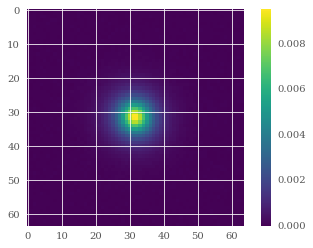

In [25]:
g2 = 0.05

img = make_data(e1=0.0, e2=g2, nu=0.5)
plt.imshow(img.array, interpolation='none', cmap=plt.cm.viridis)
plt.colorbar()

2017-04-26 19:56:31,345 - DEBUG - Setting e1 to 0.000000
2017-04-26 19:56:31,346 - DEBUG - Setting e2 to 0.050000


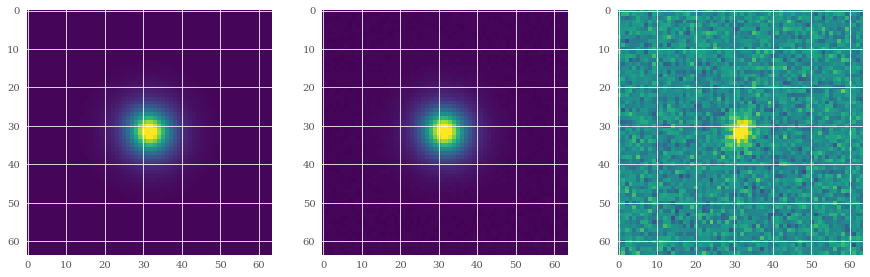

In [14]:
rstr.set_param_by_name('e1', 0.0)
rstr.set_param_by_name('e2', g2)
rstr.pixel_data = [img.array]
m = rstr._get_model_image(iepochs=0)

vmin = -0.0001
vmax = 0.008

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(m.array, vmin=vmin, vmax=vmax, interpolation='none')
plt.subplot(1, 3, 2)
plt.imshow(rstr.pixel_data[0], vmin=vmin, vmax=vmax, interpolation='none')
plt.subplot(1, 3, 3)
plt.imshow(rstr.pixel_data[0] - m.array, vmin=-1e-4, vmax=1e-4, interpolation='none')

The plot of the conditional shear component posterior shows it is well approximated by a Gaussian distribution and that the mode is close to the truth value.

[ 0.04651308  0.00087152]
shear bias: -3.487e-03 +/- 8.715e-04


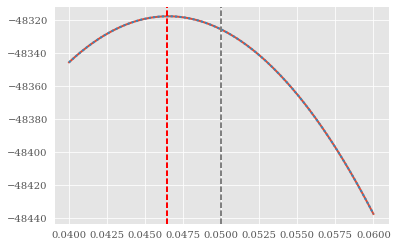

In [30]:
g = np.linspace(g2 - 0.01, g2 + 0.01, 200)
lnp = np.array([lnlike2(e1=0.0, e2=g_val, img=img) for g_val in g])

popt, pcov = fit_gaussian(g, lnp)
print popt[1:3]

print "shear bias: {:4.3e} +/- {:4.3e}".format(popt[1] - g2, popt[2])

plt.plot(g, lnp)
plt.plot(g, ln_gaus(g, popt[0], popt[1], popt[2]), linestyle='dotted')
plt.axvline(g2, color='grey', linestyle='dashed')
plt.axvline(g[np.argmax(lnp)], color='red', linestyle='dashed')

## Shear bias from an ensemble of stamps

Now that we understand the (simple) model, we simulate a sequence of stamp images with different applied shears. We fit the conditional shear component posterior for each simulated stamp, and aggregate the shear estimator and shear estimator variance.

In [32]:
g_true = np.linspace(-0.1, 0.1, 20)

bias = np.zeros((len(g_true), 2), dtype=np.float64)
for i, gt in enumerate(g_true):
    if np.mod(i, 5) == 0:
        print "--- {:d} / {:d} ---".format(i, len(g_true))
    img = make_data(e1=0.0, e2=gt, nu=0.5)
    g = np.linspace(gt - 0.01, gt + 0.01, 100)
    lnp = np.array([lnlike2(e1=0.0, e2=g_val, img=img) for g_val in g])
    try:
        popt, pcov = fit_gaussian(g, lnp)
        bias[i, 0] = popt[1] - gt
        bias[i, 1] = popt[2]
    except RuntimeError:
        plt.plot(g, lnp)
#         plt.title("g: {:4.3g}".format(gt))

--- 0 / 20 ---
--- 5 / 20 ---
--- 10 / 20 ---
--- 15 / 20 ---


Plotting the difference between the shear estimator and true applied shear versus the true applied shear lets us test the linear bias model for the shear (in the standard fashion).

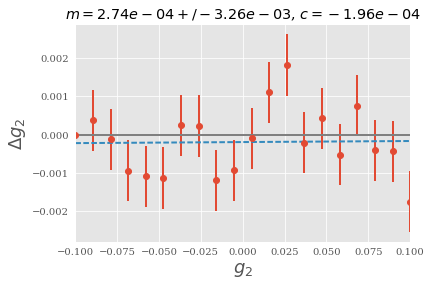

In [33]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(g_true, bias[:,0])
xl = np.linspace(np.min(g_true), np.max(g_true), 50)

plt.errorbar(g_true, bias[:,0], yerr=bias[:,1], fmt='o')
plt.axhline(0., color='grey')
plt.plot(xl, slope*xl + intercept, '--')
plt.xlabel(r"$g_2$", fontsize=18)
plt.ylabel(r"$\Delta g_{:d}$".format(2), fontsize=18)
plt.xlim(-0.1, 0.1)
plt.title(r"$m = {:3.2e} +/- {:3.2e}$, $c = {:3.2e}$".format(slope, std_err, intercept))

**Result:** We find negligible multiplicative and additive shear biases over a very large range in applied shear. 

**Conclusion:** We have succeeded in building a simple simulated model that has zero shear bias compared to the simulated data that is generated in the same way as the model.

## Next steps

Our very simple model succeeds. It's time to start adding complications until it fails.

1. Replace the  `lnlike1` function with that from `jif.Roaster`
2. Calculate shear biases using **marginal** rather than **conditional** posteriors
3. Specify the PSF as an `InterpolatedImage` object rather than a GalSim parametric model